# Univariate Linear Regression by Gradient Descent

## Importing the libraries

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Importing the Dataset

In [2]:
dataset=pd.read_csv("Life Expectancy Data.csv")

In [3]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#displaying the dataset
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Checking for the Null Values

In [5]:
pd.isna(dataset).any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [6]:
# checking details of the dataset
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Seeing the correlation matrix to select the feature

In [7]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<AxesSubplot:>

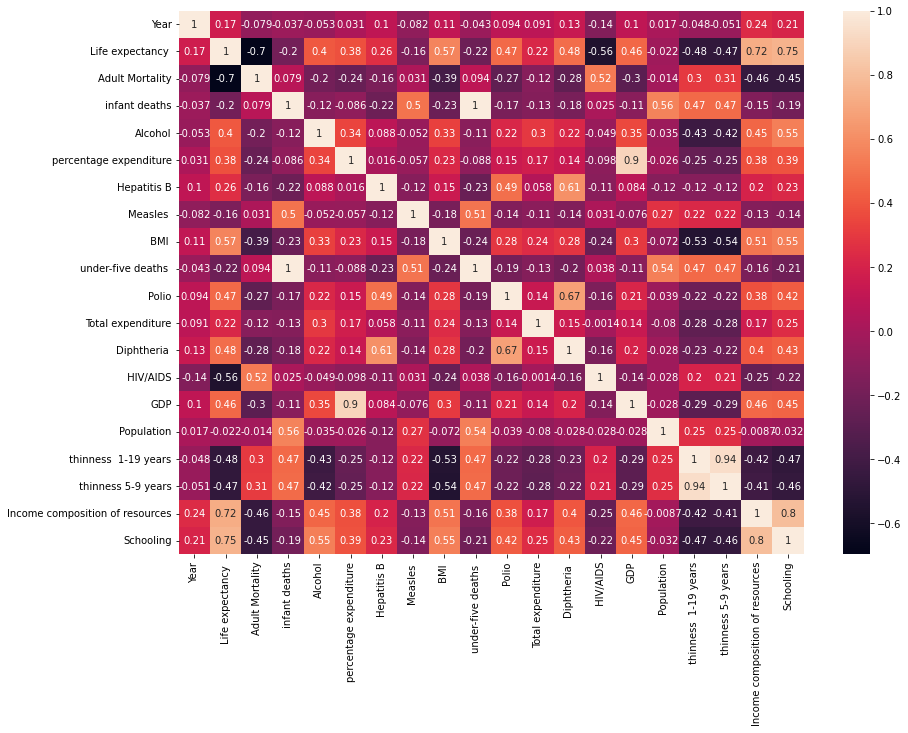

In [8]:
#Visuilizing the correlation matrix
plt.figure(figsize = (14, 10))
correlation = dataset.corr()
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
           annot=True)

### Note: After analyzing the coorelation matrix , I am considering <mark> "Income composition of resources"</mark> as my feature

## Defining feature and target variable

In [9]:
x=dataset.iloc[:,20:21].values
y=dataset.iloc[:,3:4].values

In [10]:
x

array([[0.479],
       [0.476],
       [0.47 ],
       ...,
       [0.427],
       [0.427],
       [0.434]])

In [11]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

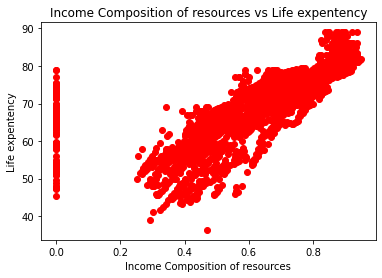

In [12]:
#plotting the actual data
plt.scatter(x,y,color='red') 
plt.title('Income Composition of resources vs Life expentency')
plt.xlabel('Income Composition of resources')
plt.ylabel("Life expentency")
plt.show()

## Taking care of missing values

<mark>Using SimpleImputer Class of sklearn.impute library to fill the missing values

In [13]:
# Using mean strategy to impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(y[:,:])
y[:,:]=imputer.transform(y[:,:])

In [14]:
# reshaping the feature into 2-D so that it can be passed in the fit() funtion of SimpleImputer class
x=np.reshape(x,(len(x),1))

In [15]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])

In [16]:
x

array([[0.479],
       [0.476],
       [0.47 ],
       ...,
       [0.427],
       [0.427],
       [0.434]])

In [17]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [18]:
len(x)

2938

In [19]:
len(y)

2938

In [20]:
#adding extra column(of value 1) in the feature for the symmetry. Doing this on purpose so that we can perform 
#the matrix multiplication between our transpose of parameter vector and feature matrix. 
x = x[:,0:len(x)]
ones = np.ones([x.shape[0],1])
x = np.concatenate((ones,x),axis=1)
theta = np.zeros([1,2])

In [21]:
x.shape,theta.shape,y.shape

((2938, 2), (1, 2), (2938, 1))

## Splitting Dataset into Training Set and Test Set

In [22]:
#giving 20% to the test set
x_test=x[0:587,:]

In [23]:
x_train=x[587:,:]

In [24]:
y_test=y[0:587,:]
y_train=y[587:,:]

In [25]:
len(x_train)+len(x_test)

2938

In [26]:
len(y_train)+len(y_test)

2938

In [27]:
print(x_train)

[[1.    0.658]
 [1.    0.659]
 [1.    0.656]
 ...
 [1.    0.427]
 [1.    0.427]
 [1.    0.434]]


In [28]:
x_train

array([[1.   , 0.658],
       [1.   , 0.659],
       [1.   , 0.656],
       ...,
       [1.   , 0.427],
       [1.   , 0.427],
       [1.   , 0.434]])

In [29]:
print(x_test)

[[1.    0.479]
 [1.    0.476]
 [1.    0.47 ]
 ...
 [1.    0.675]
 [1.    0.669]
 [1.    0.658]]


In [30]:
print(y_train)

[[72.8]
 [72.4]
 [71.8]
 ...
 [44.8]
 [45.3]
 [46. ]]


In [31]:
print(y_test)

[[65. ]
 [59.9]
 [59.9]
 [59.5]
 [59.2]
 [58.8]
 [58.6]
 [58.1]
 [57.5]
 [57.3]
 [57.3]
 [57. ]
 [56.7]
 [56.2]
 [55.3]
 [54.8]
 [77.8]
 [77.5]
 [77.2]
 [76.9]
 [76.6]
 [76.2]
 [76.1]
 [75.3]
 [75.9]
 [74.2]
 [73.5]
 [73. ]
 [72.8]
 [73.3]
 [73.6]
 [72.6]
 [75.6]
 [75.4]
 [75.3]
 [75.1]
 [74.9]
 [74.7]
 [74.4]
 [74.1]
 [73.8]
 [73.4]
 [72.9]
 [72.3]
 [71.7]
 [71.6]
 [71.4]
 [71.3]
 [52.4]
 [51.7]
 [51.1]
 [56. ]
 [51. ]
 [49.6]
 [49.1]
 [48.7]
 [48.2]
 [47.7]
 [47.4]
 [47.1]
 [46.8]
 [46.5]
 [45.7]
 [45.3]
 [76.4]
 [76.2]
 [76.1]
 [75.9]
 [75.7]
 [75.6]
 [75.4]
 [75.2]
 [75. ]
 [74.8]
 [74.6]
 [74.4]
 [74.2]
 [74. ]
 [73.8]
 [73.6]
 [76.3]
 [76.2]
 [76. ]
 [75.9]
 [75.7]
 [75.5]
 [75.6]
 [75.4]
 [74.8]
 [75.2]
 [74.9]
 [74.7]
 [74.1]
 [74.1]
 [74. ]
 [74.1]
 [74.8]
 [74.6]
 [74.4]
 [74.4]
 [73.9]
 [73.5]
 [73.3]
 [73.2]
 [73.5]
 [72.9]
 [73. ]
 [73. ]
 [72.7]
 [72.6]
 [72.6]
 [72. ]
 [82.8]
 [82.7]
 [82.5]
 [82.3]
 [82. ]
 [81.9]
 [81.7]
 [81.3]
 [81.3]
 [81.2]
 [81. ]
 [86. ]
 [83. ]


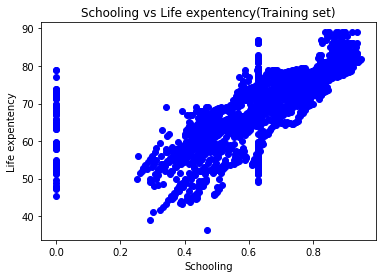

In [32]:
#Plotting the scatter plot to see the trainig set
plt.scatter(x_train[:,1:],y_train,color='blue') #plotting the actual data
plt.title('Schooling vs Life expentency(Training set)')
plt.xlabel('Schooling')
plt.ylabel("Life expentency")
plt.show()

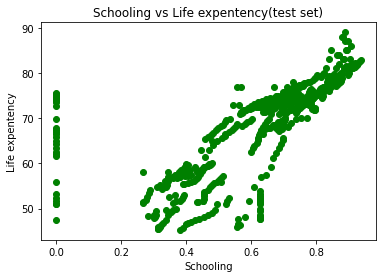

In [33]:
#plotting the scatter plot to see the test set
plt.scatter(x_test[:,1:],y_test,color='green') #plotting the actual data
plt.title('Schooling vs Life expentency(test set)')
plt.xlabel('Schooling')
plt.ylabel("Life expentency")
plt.show()

## Training our model on the training set

In [34]:
#defining the cost function
def Cost(x,y,theta):
    summed = np.power(((x @ theta.T)-y),2)
    return np.nansum(summed)/(2 * len(x))

#defining the gradient descent
def gradientDescent(x,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(x)) * np.nansum(x * (x @ theta.T - y), axis=0)
        #print(theta)
        cost[i] = Cost(x, y, theta)
    
    return theta,cost

#### Cost Function Formula
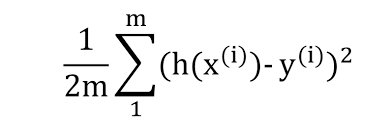

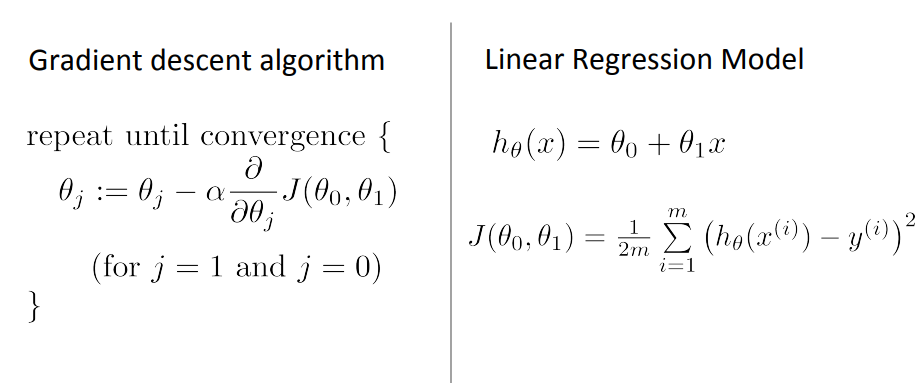

In [35]:
#setting values of gradient descent parameters
alpha = 0.01
iters = 1500

In [36]:
m,cost = gradientDescent(x_train,y_train,theta,iters,alpha)
print(m)

finalCost = Cost(x_train,y_train,m)
print(finalCost)

[[49.21601509 32.10382897]]
22.03915281306857


## Predicting on the test set

In [37]:
#predicting on the test set
def predict(m, w, b):
    return m.dot(w.T) + b
y_pred = predict(x_test, m, finalCost)

In [38]:
y_pred

array([[ 86.63290198],
       [ 86.53659049],
       [ 86.34396752],
       [ 86.11924072],
       [ 85.83030626],
       [ 85.63768328],
       [ 85.18822968],
       [ 85.15612585],
       [ 84.57825693],
       [ 84.25721864],
       [ 83.96828418],
       [ 83.48672674],
       [ 83.22989611],
       [ 82.20257358],
       [ 82.17046975],
       [ 82.10626209],
       [ 95.71828558],
       [ 95.68618175],
       [ 95.62197409],
       [ 95.39724729],
       [ 94.94779368],
       [ 94.53044391],
       [ 94.40202859],
       [ 94.14519796],
       [ 93.82415967],
       [ 93.59943287],
       [ 93.24629075],
       [ 93.11787543],
       [ 92.89314863],
       [ 92.76473331],
       [ 92.50790268],
       [ 92.31527971],
       [ 95.10831283],
       [ 95.04410517],
       [ 94.91568985],
       [ 94.75517071],
       [ 94.49834008],
       [ 94.17730179],
       [ 93.88836733],
       [ 93.6315367 ],
       [ 93.40680989],
       [ 93.27839458],
       [ 93.0857716 ],
       [ 92

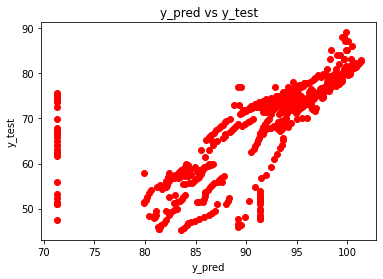

In [39]:
#Plotting the scatter plot to analyze test target variable and predicted value
plt.scatter(y_pred,y_test,color='red')
plt.title('y_pred vs y_test')
plt.xlabel('y_pred')
plt.ylabel("y_test")
plt.show()

In [40]:
print(np.concatenate((y_pred.reshape(1,len(y_pred)),y_test.reshape(1,len(y_test))),0)) ##printing horizontal

[[86.63290198 86.53659049 86.34396752 ... 92.92525246 92.73262948
  92.37948737]
 [65.         59.9        59.9        ... 73.5        73.1
  73.1       ]]


## Defining the RMSE 

In [41]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(y_pred, y_test)

23.961915896753368

#### RMSE
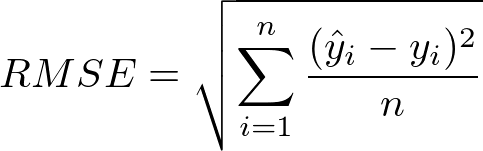

## Defining the MAE 

In [42]:
def MAE(y_pred,y):
    res=np.sum(abs(y_pred-y))/len(y)
    return res
MAE(y_pred, y_test)

22.849594889689822

#### MAE
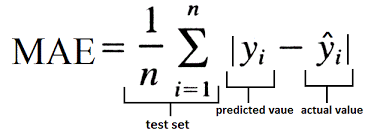

# Univariate Linear Regression by Closed Form

## Defining feature and target variable

In [56]:
x1=dataset.iloc[:,-1].values
y1=dataset.iloc[:,3:4].values
print(x)
print(y)

[[1.    0.479]
 [1.    0.476]
 [1.    0.47 ]
 ...
 [1.    0.427]
 [1.    0.427]
 [1.    0.434]]
[[65. ]
 [59.9]
 [59.9]
 ...
 [44.8]
 [45.3]
 [46. ]]


## Taking care of missing values
<mark>Using SimpleImputer Class of sklearn.impute library to fill the missing values

In [57]:
# Using mean strategy to impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(y1[:,:])
y1[:,:]=imputer.transform(y1[:,:])

In [58]:
x1=np.reshape(x1,(len(x1),1))

In [59]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x1[:,:])
x1[:,:]=imputer.transform(x1[:,:])

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x1=sc_x.fit_transform(x1)
y1=sc_y.fit_transform(y1)

In [61]:
x1.shape,theta.shape,y1.shape

((2938, 1), (1, 2), (2938, 1))

## Splitting dataset into training set and test set

In [62]:
x1_test=x[0:587,:]
x1_train=x[587:,:]
y1_test=y[0:587,:]
y1_train=y[587:,:]

## Training my model on training set

In [63]:
def find_Theta(x, y):
    
    m = x.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    x = np.append(x, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    
    return theta

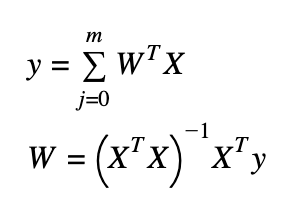

In [64]:
def predict(x,theta):
    
    # Appending a cloumn of ones in X to add the bias term.
    x = np.append(x, np.ones((x.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(x, theta)
    
    return preds

## Predicting value on test set

In [65]:
theta1 = find_Theta(x1_train, y1_train)
theta1
y1_pred = predict(x1_test,theta1)

In [66]:
y1_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## Defining RMSE

In [67]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(y1_pred, y1_test)

69.21591689502061

## Defining MAE

In [68]:
def MAE(y_pred,y):
    res=np.sum(abs(y_pred-y))/len(y)
    return res
MAE(y1_pred, y1_test)

68.43935264054514